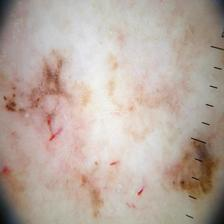

In [17]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img


train_data_dir = "../data/train/"
test_data_dir = "../data/test/"

train_data_dir = "/home/pierre/code/LRG-max/Skin_Cancer_Prevention/data/train/"
test_data_dir = "/home/pierre/code/LRG-max/Skin_Cancer_Prevention/data/test/"
import numpy as np
import matplotlib.pyplot as plt

# /home/pierre/code/LRG-max/Skin_Cancer_Prevention/data/train/malignant/2.jpg
img = load_img(f"{train_data_dir}malignant/2.jpg")
x = img_to_array(img)/255  # We divide the pixel value by 255 to end up between 0 and 1


img

In [18]:
x.shape

(224, 224, 3)

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.utils import image_dataset_from_directory


model = Sequential()

model.add(layers.Rescaling(1./255, input_shape = (224, 224, 3)))
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )



model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model.add(layers.Flatten())

# Here we flatten our data to end up with just one dimension

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation="sigmoid"))
model.summary()


adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='binary_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])


batch_size = 64


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 56, 56, 32)       

In [20]:
train_ds = image_dataset_from_directory(
  train_data_dir,
  labels = "inferred",
  label_mode = "binary",
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)

# We define a second one for the test data

val_ds = image_dataset_from_directory(
  test_data_dir,
  labels = "inferred",
  label_mode = "binary",
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)

Found 2637 files belonging to 2 classes.
Found 660 files belonging to 2 classes.


In [22]:
# import os
import mlflow
from tensorflow.keras.models import save_model

# checkpoint_path = "model/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
MODEL = "model_1"
import pickle
modelCheckpooint = callbacks.ModelCheckpoint("../model/{}.keras".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)
# modelCheckpooint = callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)
# mlflow.keras.save_model(model,"model/model.h5")
# filename = 'model.pkl'
# pickle.dump(model, open(filename, 'wb'))
# save_model(model,"../skin_cancer_prevention/model.keras")
# model.save_model("../skin_cancer_prevention/model.keras")

In [23]:
%%time
history = model.fit(
        train_ds,
        epochs=1,
        validation_data=val_ds,
        callbacks = [LRreducer, EarlyStopper])


42/42 [==============================] - ETA: 0s - loss: 0.6046 - accuracy: 0.6640

ValueError: The following argument(s) are not supported with the native Keras format: ['options']

In [24]:
save_model(model,"../skin_cancer_prevention/model.keras")


In [1]:
from tensorflow.image import resize

# result = model.predict(img)
# img_1 = resize(img, [200,200], method='nearest')
# img_1 = img.resize((200,200),interpolation="lanczos3")
img_1.shape()
img_1 = img_to_array(img_1)
# # # img_1 = img_1.resize(200,200,3)

img_1 = img_1.reshape((-1, 224, 224, 3))
img.shape
res = model.predict(img_1)[0][0]

2024-06-26 10:12:37.747533: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 10:12:37.813451: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 10:12:37.813543: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 10:12:37.813580: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 10:12:37.825980: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 10:12:37.828260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

NameError: name 'img_1' is not defined

In [ ]:
res

0.63735753